In [1]:
import pandas as pd
import nltk
import seaborn as sns
%matplotlib inline

## Извлечением ключевых биграм по мерам ассоциации 

Предобработка: соединим все 2800 текстов в один, приведем к нижнему регистру, лемматизируем удалим стоп-слова.
После закомментированного импортируется предобработанный таким образом список из файла filem.txt

In [2]:
# s1 = ''

# for i in range (1,28):
#     with open('../sem5/data/'+str(i)+'.txt') as infile:
#         for line in infile:
#             s1 += line.strip() + ' '

In [3]:
# from nltk.corpus import stopwords
# mystopwords = stopwords.words('russian') + stopwords.words('english') + stopwords.words('german')
# mystopwords += ['это', 'наш', 'т', 'д', 'этот', 'который', 'свой', 'наш', 'мой', 'твой', 'тот', 'делать', 'друг', 'сделать', 
#                 'любой', 'каждый', 'самый', 'хотеть', 'мочь', 'ваш', 'сей', 'весь', 'очень', 'день', 'год', 'м',
#                'ч', 'руб', 'л', 'например', 'становиться', 'http', 'www', 'https', 'vk', 'vkontakte', 'vk', 'com', 'ru',
#                'январь', 'февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']  


In [4]:
# l1 = prog.findall(s1.lower())
# import pymorphy2
# morph = pymorphy2.MorphAnalyzer()
# l3 = [morph.parse(token)[0].normal_form for token in l1 if not morph.parse(token)[0].normal_form in mystopwords]
# print(len(l3))

In [5]:
# f3 = open( 'filel3.txt', 'w' )
# for item in l3:
#     f3.write("%s\n" % item)
# f3.close()

In [6]:
# short3 = []
# for t in l3:
#     if len(t)>2 and len(t)<4 :
#         short3.append(t)
# dd = nltk.FreqDist(short3)

In [7]:
# m = []
# for t in l3:
#     if len(t)>2 or t in ['рф']:
#         if t not in ['ещё','оно','авг','род','чей','скр','офф','вне','бур','ред','бел', 'июн','вод','спч’,’кой','нци','аба','льн','хдс’,’аль','ммс','вит','зад','тью','имп','тий', 'ишл', 'нуть','кий', 'нный','отч']:
#             m.append(t)
# print (len(m))

In [8]:
# filem = open( 'filem.txt', 'w' )
# for item in m:
#     filem.write("%s\n" % item)
# filem.close()

In [9]:
m = []
with open('./filem.txt') as infile:
    for line in infile:
        m.append(line[:-1])

Извлечем топ-100 биграм по 4 мерам связности: 
* $ t-score $ 
* $ PMI $
* $ \chi^2 $
* $ LLR $


In [10]:
%%time 
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(m) # класс для хранения и извлечения биграм
finder.apply_freq_filter(15) # избавимся от биграм, которые встречаются реже 15 раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

CPU times: user 5.69 s, sys: 142 ms, total: 5.83 s
Wall time: 6.18 s


Сравним между собой топ-20 биграмм по каждой мере.

In [11]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(20)

,raw_freq,pmi,t-score,chi2,llr
0,владимир путин,насильственно помещать,владимир путин,кушелевый безбородко,владимир путин
1,прямая линия,петропавловск камчатский,прямая линия,оао ржд,прямая линия
2,дональд трамп,саманта пауэр,дональд трамп,пастина родион,риа новость
3,курортный сбор,саудовский аравия,курортный сбор,петропавловск камчатский,дональд трамп
4,риа новость,оао ржд,риа новость,рублево успенский,курортный сбор
5,премьер министр,межпозвоночный остеохондроз,премьер министр,сильвий гермона,исаакиевский собор
6,исаакиевский собор,пастина родион,исаакиевский собор,хирургия травматология,премьер министр
7,евгений евтушенко,рублево успенский,евгений евтушенко,черепный мозговой,санкт петербург
8,алексей навальный,капитолийский холм,алексей навальный,шинна фейн,евгений евтушенко
9,президент сша,сильвий гермона,президент сша,копеечка высчитывать,виталий чуркин


Для более формального сравнения посчитаем ранговый коэффициент корреляции Спирмена на топ-100 биграммах:

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


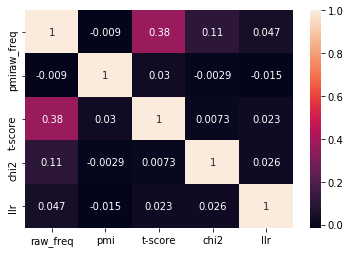

In [12]:
from scipy.stats import spearmanr
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))